# 載入基本的模組，包括google及matplotlib

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 比較numpy相加和cv2相加的差別

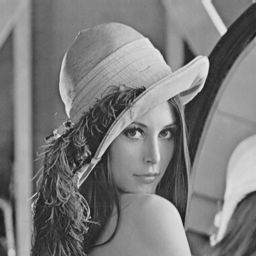

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9f59b75b38>,
 <matplotlib.image.AxesImage at 0x7f9f59af0278>)

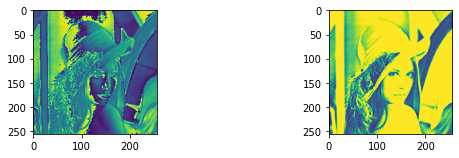

In [ ]:
a=cv2.imread("lena.bmp",0)
cv2_imshow(a)
b=a
result1=a+b
result2=cv2.add(a,b)

fig, ax = plt.subplots(figsize = (15, 5))

plt.subplot(231),plt.imshow(result1)
plt.subplot(232),plt.imshow(result2)

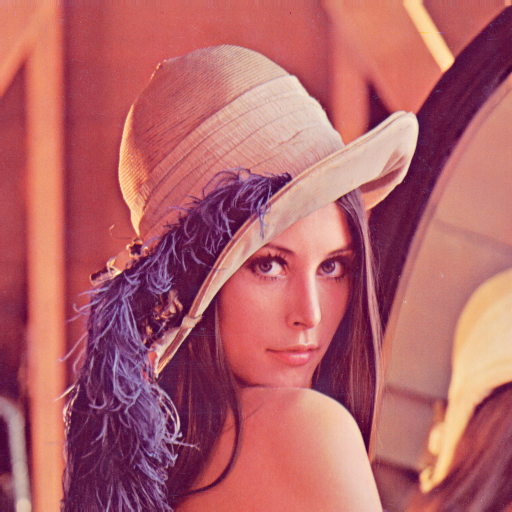

(3, 512, 512)

In [ ]:
a=cv2.imread("lenacolor.png")
cv2_imshow(a)
t = a.transpose(2,1,0)
t.shape

# 權重相加

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9f57d85208>,
 <matplotlib.image.AxesImage at 0x7f9f57d679b0>)

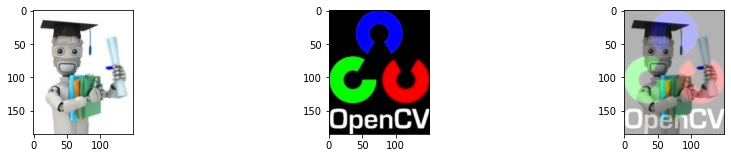

In [ ]:
img1 = cv2.imread('ml.png')
img2 = cv2.imread('opencv_logo.png')

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

fig, ax = plt.subplots(figsize = (15, 5))

plt.subplot(231),plt.imshow(img1)
plt.subplot(232),plt.imshow(img2)
plt.subplot(233),plt.imshow(dst)

# 將一張圖像去背後加到另一張圖形上面，使用threshold及bitwise

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fef51625518>)

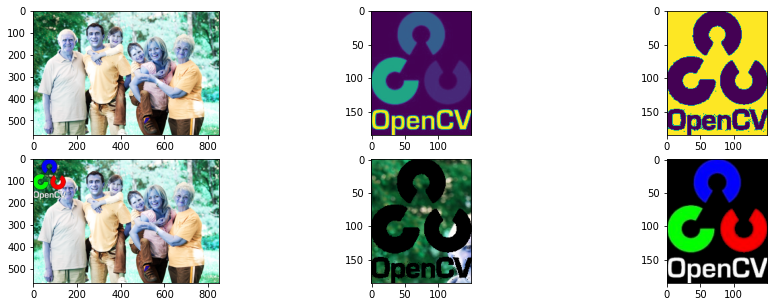

In [ ]:
# Load two images
img1 = cv2.imread('family.jpg')
img2 = cv2.imread('opencv_logo.png')

fig, ax = plt.subplots(figsize = (15, 5))

plt.subplot(231),plt.imshow(img1)

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.subplot(232),plt.imshow(img2gray)
plt.subplot(233),plt.imshow(mask_inv)
plt.subplot(234),plt.imshow(img1)
plt.subplot(235),plt.imshow(img1_bg)
plt.subplot(236),plt.imshow(img2_fg)

In [ ]:
import cv2
import numpy as np
img1 = cv2.imread('jiemi.jpg')
img2 = cv2.imread('logo.jpg')
    
r1,c1,ch1 = img1.shape
r2,c2,ch2 = img2.shape
roi = img1[r1-r2:r1, c1-c2:c1 ]
    
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    
ret, ma1 = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
fg1 = cv2.bitwise_and(roi,roi,mask=ma1)
    
ret, ma2 = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY_INV)
fg2 = cv2.bitwise_and(img2,img2,mask = ma2)
    
roi[:] = cv2.add(fg1, fg2)
    
cv2.imshow('img1',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()